<a href="https://colab.research.google.com/github/abir1234-art/TaskTechnoHacks_Task3_Diabetes-Prediction/blob/main/house-prices-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv'
test_path = '/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv'
df = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-6-b06cb26ff69f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


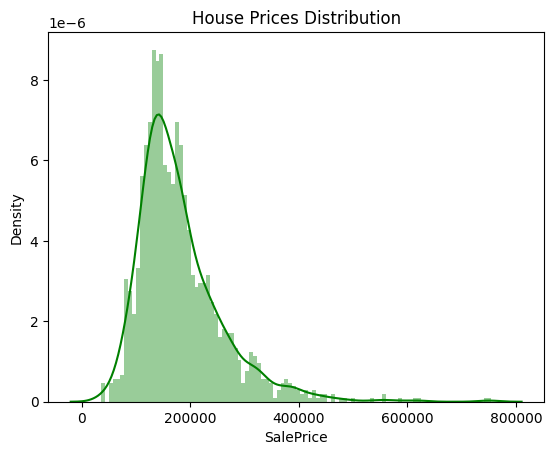

In [6]:
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('House Prices Distribution')
plt.show()

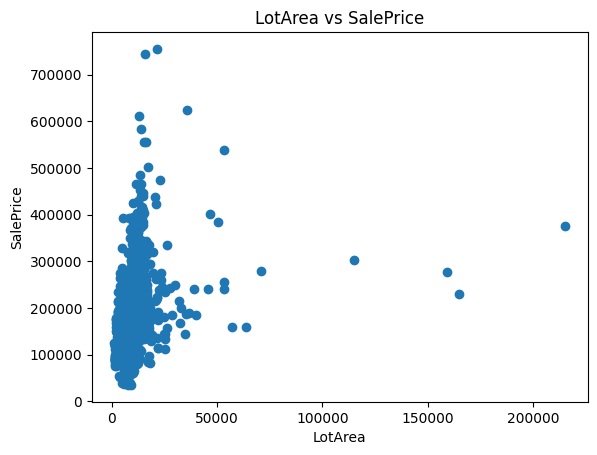

In [7]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

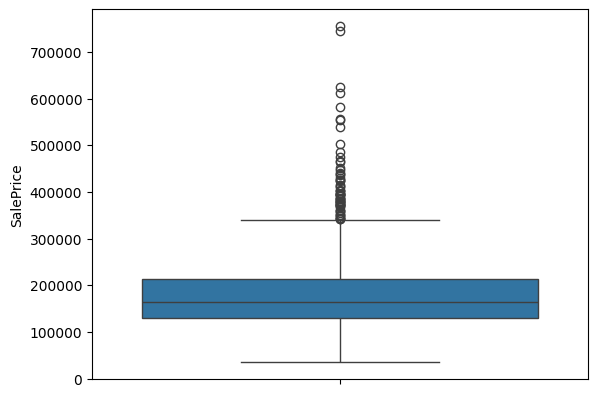

In [8]:
sns.boxplot(df['SalePrice'])
plt.show()

In [9]:
df.loc[df.SalePrice > 330000,'SalePrice'] = 330000

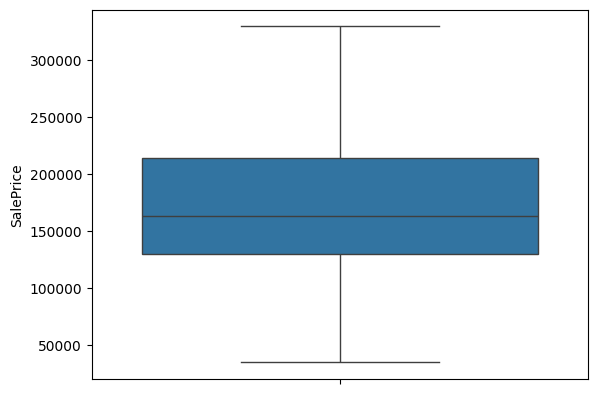

In [10]:
sns.boxplot(df['SalePrice'])
plt.show()

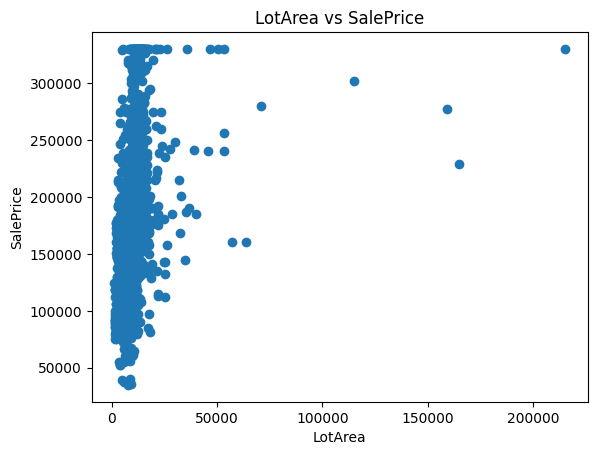

In [11]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

In [12]:
droped_columns = ['Id', 'MSSubClass', 'LotFrontage', 'Alley', 'SaleType', 'SaleCondition', 'Neighborhood', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'Functional', 'PoolQC', 'Fence', 'MiscFeature']


In [13]:
df = df.drop(droped_columns, axis=1)
test_set = test_set.drop(droped_columns, axis=1)

In [14]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1455 non-null   object 
 1   LotArea        1459 non-null   int64  
 2   Street         1459 non-null   object 
 3   LotShape       1459 non-null   object 
 4   LandContour    1459 non-null   object 
 5   Utilities      1457 non-null   object 
 6   LotConfig      1459 non-null   object 
 7   LandSlope      1459 non-null   object 
 8   Condition1     1459 non-null   object 
 9   Condition2     1459 non-null   object 
 10  HouseStyle     1459 non-null   object 
 11  OverallQual    1459 non-null   int64  
 12  OverallCond    1459 non-null   int64  
 13  YearBuilt      1459 non-null   int64  
 14  YearRemodAdd   1459 non-null   int64  
 15  MasVnrType     1443 non-null   object 
 16  MasVnrArea     1444 non-null   float64
 17  ExterQual      1459 non-null   object 
 18  ExterCon

In [15]:
encoder = {}
df_object = df.select_dtypes(['object'])
for column in df_object.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    test_set[column] = le.fit_transform(test_set[column])
    encoder[column] = le

In [16]:
imputer = SimpleImputer()
df = imputer.fit_transform(df)
test_set = imputer.fit_transform(test_set)

In [17]:
x, y = df[:,:-1], df[:,-1]
(x.shape, y.shape)

((1460, 63), (1460,))

In [18]:
sc = StandardScaler()
x = sc.fit_transform(x)
test_set = sc.transform(test_set)

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.8)
x_train.shape, y_train.shape

((1168, 63), (1168,))

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
pred = lr.predict(x_val)

In [22]:
mean_absolute_error(pred, y_val)

34040484806267.973

In [24]:
y_test = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/sample_submission.csv')
y_test = y_test.iloc[:,1]

In [25]:
pred = lr.predict(test_set)

In [26]:
mean_absolute_error(pred, y_test)

13625526516477.1

In [27]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)
pred = forest.predict(x_val)

In [28]:
mean_absolute_error(pred, y_val)

15290.979520547948

In [29]:
f_pred = forest.predict(test_set)
mean_absolute_error(f_pred, y_test)

48778.16105224546

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(63,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8192      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 41345 (161.50 KB)
Trainable params: 41345 (161.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
history = model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
37/37 [==============================] - 2s 5ms/step - loss: 34724966400.0000 - mae: 174979.0000
Epoch 2/100
37/37 [==============================] - 0s 6ms/step - loss: 34572464128.0000 - mae: 174606.1406
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 33266221056.0000 - mae: 171554.3438
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 27741102080.0000 - mae: 157718.8750
Epoch 5/100
37/37 [==============================] - 0s 7ms/step - loss: 16298672128.0000 - mae: 120680.7500
Epoch 6/100
37/37 [==============================] - 0s 6ms/step - loss: 8087677440.0000 - mae: 75933.2031
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 5830622208.0000 - mae: 60372.3203
Epoch 8/100
37/37 [==============================] - 0s 5ms/step - loss: 4626122752.0000 - mae: 52526.2891
Epoch 9/100
37/37 [==============================] - 0s 4ms/step - loss: 3831446528.0000 - mae: 47087.5156
Epoch 10/100
37/37 [=======

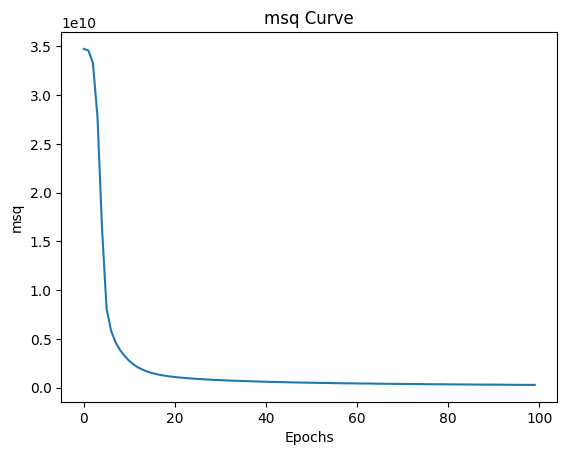

In [32]:
plt.plot(range(100), history.history['loss'])
plt.title('msq Curve')
plt.xlabel('Epochs')
plt.ylabel('msq')
plt.show()


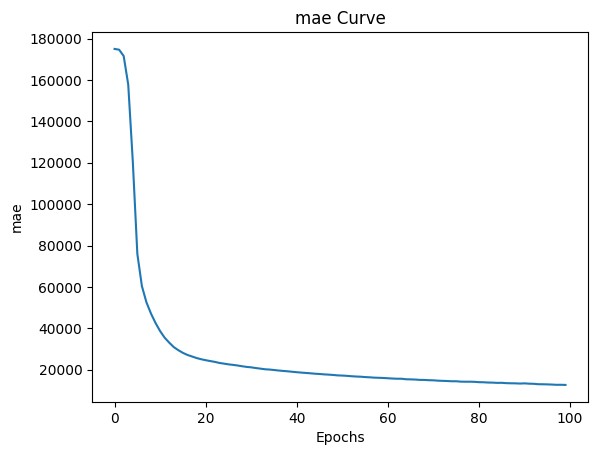

In [33]:
plt.plot(range(100), history.history['mae'])
plt.title('mae Curve')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.show()

In [34]:
model.evaluate(x_val, y_val)

10/10 [==============================] - 0s 4ms/step - loss: 927364032.0000 - mae: 20928.1152


[927364032.0, 20928.115234375]

In [35]:
model.evaluate(test_set, y_test)

46/46 [==============================] - 1s 4ms/step - loss: 3897149440.0000 - mae: 51763.7188


[3897149440.0, 51763.71875]

In [36]:
data = {'Id':list(range(1461,2920)), 'SalePrice':f_pred}
result = pd.DataFrame(data)
result.head()

,Id,SalePrice
0,1461,128884.00
1,1462,153365.90
2,1463,179589.75
3,1464,184079.70
4,1465,190771.99


In [38]:
result.to_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/result.csv', index=False)